In [223]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [224]:
df = pd.read_csv('./dataverse_files/mmALL_073119_csv.csv')

In [225]:
df.shape

(16363, 31)

In [226]:
pd.set_option('display.max_columns',None)

In [227]:
# Thinking stateresponse numbers for classification
# Chose not to use dummies in this case

# stateresponse_codes = {'accomodation':1,'ignore':2,'arrests':3,'crowd dispersal':4,
#                        'shootings':5,'beatings':6,'killings':7}

# protesterdemand_codes = {'political behavior, process':1,
#                          'labor wage dispute':2,
#                          'price increases, tax policy':3,
#                          'removal of politician':4,
#                          'police brutality':5,'land farm issue':6,
#                          'social restrictions':7}

# for col in df.columns:
#     if 'demand' in col:
#         df[col] = df[col].map(protesterdemand_codes)

# for col in df.columns:
#     if 'response' in col:
#         df[col] = df[col].map(stateresponse_codes)

In [228]:
# some engineering for protest length by total days

df['years'] = df['endyear'] - df['startyear']
df['months'] = df['endmonth'] - df['startmonth']
df['days'] = df['endday'] - df['startday']

df['total_days'] = df['days'] + (df['months']*30.5) + (df['years']*365)

In [229]:
# df['country'].value_counts().head(15)

In [230]:
df['protesterdemand1'].value_counts().head(15)

political behavior, process    9181
labor wage dispute             1667
price increases, tax policy    1059
removal of politician           950
police brutality                785
land farm issue                 448
social restrictions             413
Name: protesterdemand1, dtype: int64

In [231]:
df.groupby(['protesterdemand1','stateresponse1','protest']).count().head(25)

id  country  ccode  \
protesterdemand1            stateresponse1  protest                         
labor wage dispute          accomodation    1         205      205    205   
                            arrests         1          70       70     70   
                            beatings        1          23       23     23   
                            crowd dispersal 1         326      326    326   
                            ignore          1        1006     1006   1006   
                            killings        1           8        8      8   
                            shootings       1          23       23     23   
land farm issue             accomodation    1          49       49     49   
                            arrests         1          28       28     28   
                            beatings        1           6        6      6   
                            crowd dispersal 1         111      111    111   
                            ignore          1         234      234    234   
                            killings        1           7        7      7   
                            shootings       1          12       12     12   
police brutality            accomodation    1          51       51     51   
                            arrests         1          63       63     63   
                            beatings        1          35       35     35   
                            crowd dispersal 1         270      270    270   
                            ignore          1         296      296    296   
                            killings        1          20       20     20   
                            shootings       1          47       47     47   
political behavior, process accomodation    1         432      432    432   
                            arrests         1         704      704    704   
                            beatings        1         198      198    198   
                            crowd dispersal 1        2334     2334   2334   

                                                     year  region  \
protesterdemand1            stateresponse1  protest                 
labor wage dispute          accomodation    1         205     205   
                            arrests         1          70      70   
                            beatings        1          23      23   
                            crowd dispersal 1         326     326   
                            ignore          1        1006    1006   
                            killings        1           8       8   
                            shootings       1          23      23   
land farm issue             accomodation    1          49      49   
                            arrests         1          28      28   
                            beatings        1           6       6   
                            crowd dispersal 1         111     111   
                            ignore          1         234     234   
                            killings        1           7       7   
                            shootings       1          12      12   
police brutality            accomodation    1          51      51   
                            arrests         1          63      63   
                            beatings        1          35      35   
                            crowd dispersal 1         270     270   
                            ignore          1         296     296   
                            killings        1          20      20   
                            shootings       1          47      47   
political behavior, process accomodation    1         432     432   
                            arrests         1         704     704   
                            beatings        1         198     198   
                            crowd dispersal 1        2334    2334   

                                                     protestnumber  startday  \
protesterdemand1            sta

In [232]:
df['protesterdemand1'].isnull().count()

16363

In [233]:
df['stateresponse2'].value_counts()

arrests            692
crowd dispersal    568
accomodation       382
beatings           370
shootings          360
killings           311
ignore              33
Name: stateresponse2, dtype: int64

In [234]:
df['stateresponse3'].value_counts()

arrests            214
crowd dispersal    207
killings           175
accomodation        92
beatings            80
shootings           72
ignore              10
Name: stateresponse3, dtype: int64

In [235]:
df['stateresponse4'].value_counts()

accomodation       64
arrests            50
crowd dispersal    40
killings           38
shootings          19
beatings           19
Name: stateresponse4, dtype: int64

In [236]:
df['protesterdemand1'].value_counts()

political behavior, process    9181
labor wage dispute             1667
price increases, tax policy    1059
removal of politician           950
police brutality                785
land farm issue                 448
social restrictions             413
Name: protesterdemand1, dtype: int64

In [237]:
df['protesterdemand2'].value_counts()

political behavior, process    973
removal of politician          603
labor wage dispute             417
price increases, tax policy    201
social restrictions            201
police brutality               181
land farm issue                100
Name: protesterdemand2, dtype: int64

In [238]:
df['protesterdemand3'].value_counts()

price increases, tax policy    111
labor wage dispute              60
removal of politician           56
political behavior, process     35
police brutality                28
social restrictions             14
land farm issue                 12
Name: protesterdemand3, dtype: int64

In [239]:
df['protesteridentity'].value_counts()

protesters                                                 1300
students                                                    490
unspecified                                                 224
workers                                                     223
farmers                                                     187
                                                           ... 
protesters, labor unions,                                     1
Irish Nurses and Midwives Organization  INMO  and SIPTU       1
proteters                                                     1
Parents, Teachers, and Students                               1
Farmers of the Vilkaviskis region                             1
Name: protesteridentity, Length: 5808, dtype: int64

In [240]:
df['protesterviolence'].value_counts()

0.0    11217
1.0     3816
Name: protesterviolence, dtype: int64

In [241]:
df['stateresponse7'].value_counts()

.               913
accomodation      3
arrests           2
killings          1
beatings          1
Name: stateresponse7, dtype: int64

In [242]:
df[df['protest'] == 0].shape

(1849, 35)

In [243]:
df.groupby(['stateresponse1','protesterdemand1'])['country'].count()

stateresponse1   protesterdemand1           
accomodation     labor wage dispute              205
                 land farm issue                  49
                 police brutality                 51
                 political behavior, process     432
                 price increases, tax policy      82
                 removal of politician            90
                 social restrictions              28
arrests          labor wage dispute               70
                 land farm issue                  28
                 police brutality                 63
                 political behavior, process     704
                 price increases, tax policy      98
                 removal of politician            57
                 social restrictions              27
beatings         labor wage dispute               23
                 land farm issue                   6
                 police brutality                 35
                 political behavior, process     198
 

In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16363 entries, 0 to 16362
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     16363 non-null  int64  
 1   country                16363 non-null  object 
 2   ccode                  16363 non-null  int64  
 3   year                   16363 non-null  int64  
 4   region                 16363 non-null  object 
 5   protest                16363 non-null  int64  
 6   protestnumber          16363 non-null  int64  
 7   startday               14514 non-null  float64
 8   startmonth             14514 non-null  float64
 9   startyear              14514 non-null  float64
 10  endday                 14514 non-null  float64
 11  endmonth               14514 non-null  float64
 12  endyear                14514 non-null  float64
 13  protesterviolence      15033 non-null  float64
 14  location               14493 non-null  object 
 15  pa

In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16363 entries, 0 to 16362
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     16363 non-null  int64  
 1   country                16363 non-null  object 
 2   ccode                  16363 non-null  int64  
 3   year                   16363 non-null  int64  
 4   region                 16363 non-null  object 
 5   protest                16363 non-null  int64  
 6   protestnumber          16363 non-null  int64  
 7   startday               14514 non-null  float64
 8   startmonth             14514 non-null  float64
 9   startyear              14514 non-null  float64
 10  endday                 14514 non-null  float64
 11  endmonth               14514 non-null  float64
 12  endyear                14514 non-null  float64
 13  protesterviolence      15033 non-null  float64
 14  location               14493 non-null  object 
 15  pa

In [246]:
df[50:80]

,id,country,ccode,year,region,protest,protestnumber,startday,startmonth,startyear,endday,endmonth,endyear,protesterviolence,location,participants_category,participants,protesteridentity,protesterdemand1,protesterdemand2,protesterdemand3,protesterdemand4,stateresponse1,stateresponse2,stateresponse3,stateresponse4,stateresponse5,stateresponse6,stateresponse7,sources,notes,years,months,days,total_days
50,202016010,Canada,20,2016,North America,1,10,13.0,10.0,2016.0,11.0,11.0,2016.0,0.0,Labrador,100-999,busloads,indigenous residents,"political behavior, process",NaN,NaN,NaN,arrests,NaN,NaN,NaN,NaN,NaN,NaN,1. Protests against Muskrat Falls hydro proj...,Protests. Hunger strikes. Sit ins that disrup...,0.0,1.0,-2.0,28.5
51,202017001,Canada,20,2017,North America,1,1,1.0,10.0,2017.0,26.0,10.0,2017.0,0.0,Montreal,50-99,50,Muslim Council of Montreal,social restrictions,NaN,NaN,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,"Behind Quebec s Ban on Face Coverings, a Deba...",They came to the metro station in scarves and ...,0.0,0.0,25.0,25.0
52,202018001,Canada,20,2018,North America,1,1,9.0,2.0,2018.0,9.0,2.0,2018.0,0.0,Saskatchewan,100-999,widespread,Indigenous,"political behavior, process",NaN,NaN,NaN,accomodation,NaN,NaN,NaN,NaN,NaN,NaN,Trudeau to Meet With Family of Fatally Shot C...,After widespread protests over the acquittal ...,0.0,0.0,0.0,0.0
53,202018002,Canada,20,2018,North America,1,2,17.0,3.0,2018.0,25.0,3.0,2018.0,0.0,Toronto; national,2000-4999,thousands,March for Our Lives,social restrictions,NaN,NaN,NaN,accomodation,NaN,NaN,NaN,NaN,NaN,NaN,"After a rash of shootings, Canada aims to tig...",In a scene more common in Canada s neighbor t...,0.0,0.0,8.0,8.0
54,202019001,Canada,20,2019,North America,1,1,7.0,1.0,2019.0,8.0,1.0,2019.0,0.0,British Columbia; national,100-999,100,residents; activists,land farm issue,NaN,NaN,.,arrests,NaN,NaN,NaN,.,NaN,NaN,"For Trudeau, tension over pipeline, indigenou...",The pictures emerging from the scene of an an...,0.0,0.0,1.0,1.0
55,202019002,Canada,20,2019,North America,1,2,8.0,1.0,2019.0,8.0,1.0,2019.0,0.0,"Calgary, Alberta",50-99,50,pro pipeline demonstrators,land farm issue,NaN,NaN,.,ignore,NaN,NaN,NaN,.,NaN,NaN,"For Trudeau, tension over pipeline, indigenou...",The pictures emerging from the scene of an an...,0.0,0.0,0.0,0.0
56,202019003,Canada,20,2019,North America,1,3,26.0,1.0,2019.0,26.0,1.0,2019.0,0.0,British Columbia,50-99,50,Wet suwet en tribe,land farm issue,NaN,NaN,.,crowd dispersal,arrests,NaN,NaN,.,NaN,NaN,The Nation Has Stood Up : Indigenous Clans i...,"Amid vast forests of spruce, pine and poplar ...",0.0,0.0,0.0,0.0
57,401990000,Cuba,40,1990,North America,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,401991000,Cuba,40,1991,North America,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,401992000,Cuba,40,1992,North America,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [247]:
df[df['country'] == 'Cuba'].shape

(120, 35)

In [248]:
df.shape

(16363, 35)

In [249]:
df.sort_values(by='protestnumber',ascending=False).groupby('country').count()

,id,ccode,year,region,protest,protestnumber,startday,startmonth,startyear,endday,endmonth,endyear,protesterviolence,location,participants_category,participants,protesteridentity,protesterdemand1,protesterdemand2,protesterdemand3,protesterdemand4,stateresponse1,stateresponse2,stateresponse3,stateresponse4,stateresponse5,stateresponse6,stateresponse7,sources,notes,years,months,days,total_days
country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,55,55,55,55,55,55,38,38,38,38,38,38,54,38,26,54,31,38,7,0,7,38,5,0,0,7,0,5,38,38,38,38,38,38
Albania,82,82,82,82,82,82,67,67,67,67,67,67,67,67,67,67,67,67,12,0,18,67,26,2,0,18,0,1,67,67,67,67,67,67
Algeria,74,74,74,74,74,74,58,58,58,58,58,58,71,58,35,71,58,58,27,0,20,58,5,0,0,20,0,3,58,58,58,58,58,58
Angola,37,37,37,37,37,37,23,23,23,23,23,23,23,23,23,23,23,23,1,0,2,23,8,1,0,2,0,3,23,23,23,23,23,23
Argentina,116,116,116,116,116,116,112,112,112,112,112,112,113,112,19,113,84,112,6,0,7,111,24,5,0,7,0,5,112,112,112,112,112,112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,35,35,35,35,35,35,19,19,19,19,19,19,31,19,4,31,19,19,6,2,2,19,9,1,0,2,0,1,19,18,19,19,19,19
Yemen,165,165,165,165,165,165,157,157,157,157,157,157,162,157,45,162,92,157,71,4,2,157,46,17,5,3,1,11,157,157,157,157,157,157
Yugoslavia,138,138,138,138,138,138,137,137,137,137,137,137,137,137,136,137,137,137,50,8,3,137,33,13,5,0,0,0,137,137,137,137,137,137


In [250]:
df.groupby(['country','protest'])['protestnumber'].sum()

country      protest
Afghanistan  0             0
             1           107
Albania      0             0
             1           265
Algeria      0             0
                        ... 
Yugoslavia   1          1328
Zambia       0             0
             1           309
Zimbabwe     0             0
             1           420
Name: protestnumber, Length: 321, dtype: int64

In [251]:
region_protests = pd.DataFrame(df.groupby(['region','protest'])['protestnumber'].sum())
region_protests = region_protests.loc[region_protests['protestnumber'] != 0]
region_protests = region_protests.sort_values(by='protestnumber',ascending=False)
region_protests.T

region,Europe,Africa,Asia,South America,MENA,North America,Central America,Oceania
protest,1,1,1,1,1,1,1,1
protestnumber,48659,26904,21578,7771,7022,3699,1612,72


In [252]:
pd.DataFrame(df.groupby(['country','protest']).sum().sort_values(by='protestnumber',ascending=False)['protestnumber']).head(25).T

country,Kenya,Ireland,France,United Kingdom,Germany,Bangladesh,Ukraine,Greece,Romania,South Korea,Nigeria,Yemen,Venezuela,China,Cuba,Kyrgyzstan,Thailand,Namibia,Madagascar,Brazil,Nepal,Yugoslavia,Bulgaria,USSR,South Africa
protest,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
protestnumber,12662,7188,6984,6004,5421,4966,4330,3322,3295,3188,2578,2534,2314,2245,2143,2006,1783,1684,1439,1426,1353,1328,1263,1155,1066


In [253]:
df.drop(columns=['id','sources','notes'],inplace=True)

In [254]:
df.head()

,country,ccode,year,region,protest,protestnumber,startday,startmonth,startyear,endday,endmonth,endyear,protesterviolence,location,participants_category,participants,protesteridentity,protesterdemand1,protesterdemand2,protesterdemand3,protesterdemand4,stateresponse1,stateresponse2,stateresponse3,stateresponse4,stateresponse5,stateresponse6,stateresponse7,years,months,days,total_days
0,Canada,20,1990,North America,1,1,15.0,1.0,1990.0,15.0,1.0,1990.0,0.0,national,NaN,1000s,unspecified,"political behavior, process",labor wage dispute,NaN,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
1,Canada,20,1990,North America,1,2,25.0,6.0,1990.0,25.0,6.0,1990.0,0.0,"Montreal, Quebec",NaN,1000,unspecified,"political behavior, process",NaN,NaN,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
2,Canada,20,1990,North America,1,3,1.0,7.0,1990.0,1.0,7.0,1990.0,0.0,"Montreal, Quebec",NaN,500,separatist Parti Quebecois,"political behavior, process",NaN,NaN,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
3,Canada,20,1990,North America,1,4,12.0,7.0,1990.0,6.0,9.0,1990.0,1.0,"Montreal, Quebec",NaN,100s,Mohawk Indians,land farm issue,NaN,NaN,NaN,accomodation,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,-6.0,55.0
4,Canada,20,1990,North America,1,5,14.0,8.0,1990.0,15.0,8.0,1990.0,1.0,"Montreal, Quebec",NaN,950,local residents,"political behavior, process",NaN,NaN,NaN,crowd dispersal,arrests,accomodation,NaN,NaN,NaN,NaN,0.0,0.0,1.0,1.0


In [255]:
# including start day for protest duration
df['total_days'] = df['total_days'] + 1

In [256]:
only_p = df[df['protest'] == 1].copy()
only_p.shape, df.shape

((14514, 32), (16363, 32))

In [257]:
other = df[df['total_days'] < 15]

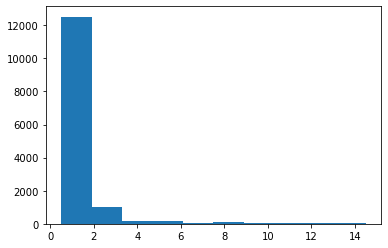

In [258]:
plt.hist(other['total_days'],bins=10);

In [259]:
df.head()

,country,ccode,year,region,protest,protestnumber,startday,startmonth,startyear,endday,endmonth,endyear,protesterviolence,location,participants_category,participants,protesteridentity,protesterdemand1,protesterdemand2,protesterdemand3,protesterdemand4,stateresponse1,stateresponse2,stateresponse3,stateresponse4,stateresponse5,stateresponse6,stateresponse7,years,months,days,total_days
0,Canada,20,1990,North America,1,1,15.0,1.0,1990.0,15.0,1.0,1990.0,0.0,national,NaN,1000s,unspecified,"political behavior, process",labor wage dispute,NaN,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0
1,Canada,20,1990,North America,1,2,25.0,6.0,1990.0,25.0,6.0,1990.0,0.0,"Montreal, Quebec",NaN,1000,unspecified,"political behavior, process",NaN,NaN,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0
2,Canada,20,1990,North America,1,3,1.0,7.0,1990.0,1.0,7.0,1990.0,0.0,"Montreal, Quebec",NaN,500,separatist Parti Quebecois,"political behavior, process",NaN,NaN,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0
3,Canada,20,1990,North America,1,4,12.0,7.0,1990.0,6.0,9.0,1990.0,1.0,"Montreal, Quebec",NaN,100s,Mohawk Indians,land farm issue,NaN,NaN,NaN,accomodation,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,-6.0,56.0
4,Canada,20,1990,North America,1,5,14.0,8.0,1990.0,15.0,8.0,1990.0,1.0,"Montreal, Quebec",NaN,950,local residents,"political behavior, process",NaN,NaN,NaN,crowd dispersal,arrests,accomodation,NaN,NaN,NaN,NaN,0.0,0.0,1.0,2.0


In [260]:
# starts = ['startyear','startmonth','startday']
# ends = ['endyear','endmonth','endday']

# df.fillna(0,inplace=True)

# # for col in df.columns:
#     if 'start' in col or 'end' in col:
#         df[col].apply(lambda x: int(x))
#         df[col].apply(lambda x: str(x))
    


# df['end_datetime'] = df['endday'].map(str) + '/' + df['endmonth'].map(str) + '/' + df['endyear'].map(str)
# df['start_datetime'] = df['startday'].map(str) + '/' + df['startmonth'].map(str) + '/' + df['startyear'].map(str)

In [261]:
# df['stateactions'] = ''

# for col in df.columns:
#     if 'response' in col:
#         df['stateactions'] = df['stateactions'] + ' ' + df[col]
        
# df['stateactions']

In [262]:
# df['stateactions'].value_counts()

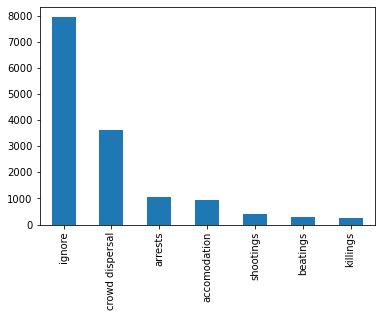

In [263]:
df['stateresponse1'].value_counts().plot.bar();

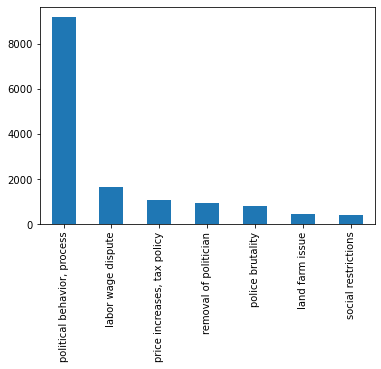

In [264]:
df['protesterdemand1'].value_counts().plot.bar();

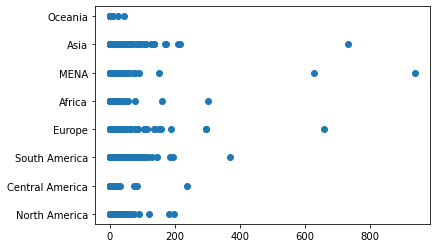

In [265]:
plt.scatter(df['total_days'],df['region'])

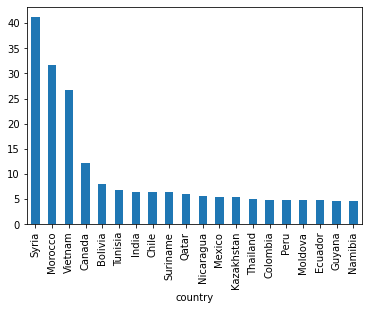

In [266]:
df.groupby('country')['total_days'].mean().sort_values(ascending=False).head(20).plot.bar();

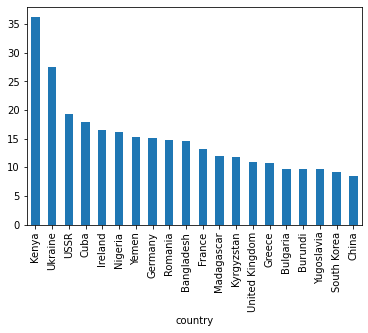

In [267]:
df.groupby('country')['protestnumber'].mean().sort_values(ascending=False).head(20).plot.bar();

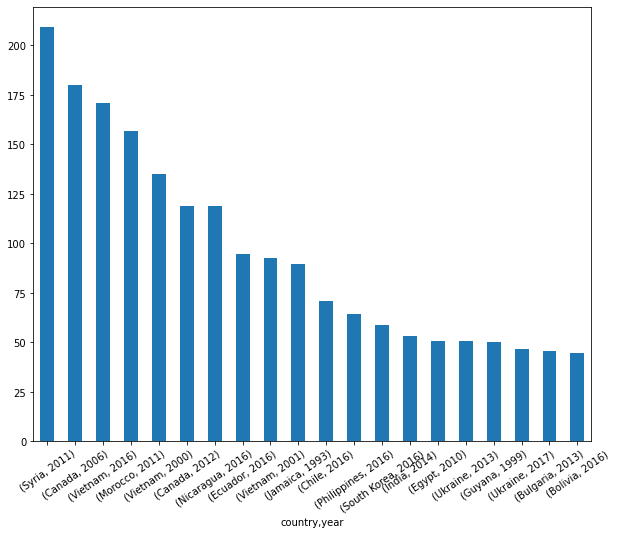

In [268]:
plt.figure(figsize=(10,8))
df.groupby(['country','year'])['total_days'].mean().sort_values(ascending=False).head(20).plot.bar()
plt.xticks(rotation=35);

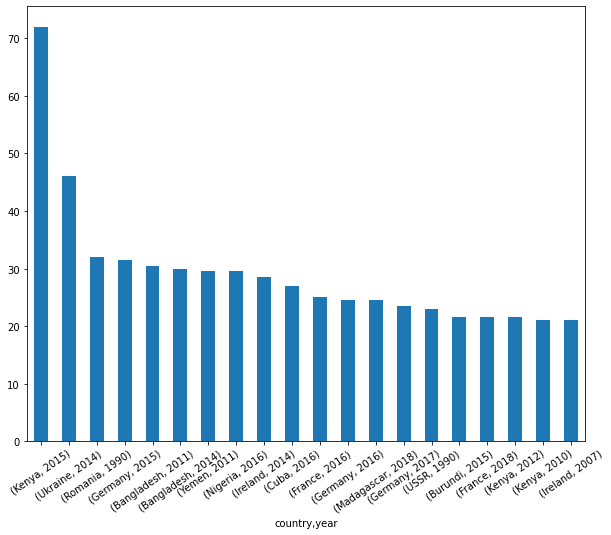

In [269]:
plt.figure(figsize=(10,8))
df.groupby(['country','year'])['protestnumber'].mean().sort_values(ascending=False).head(20).plot.bar()
plt.xticks(rotation=35);
# format the axes and labels

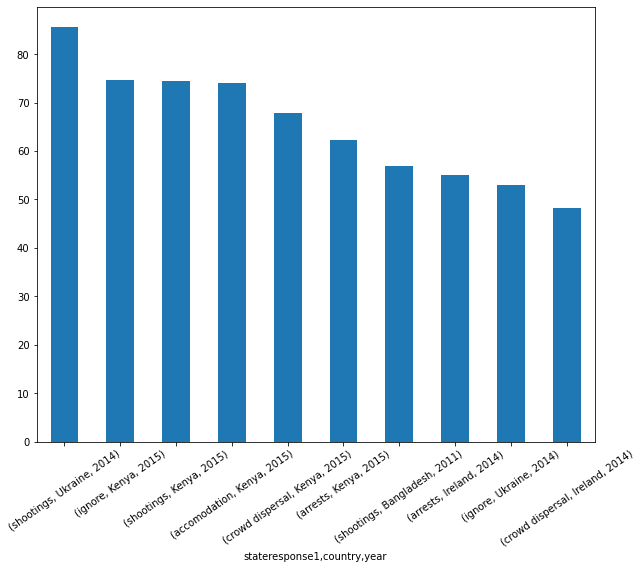

In [270]:
plt.figure(figsize=(10,8))
df.groupby(['stateresponse1','country','year'])['protestnumber'].mean().sort_values(ascending=False).head(10).plot.bar()
plt.xticks(rotation=35);

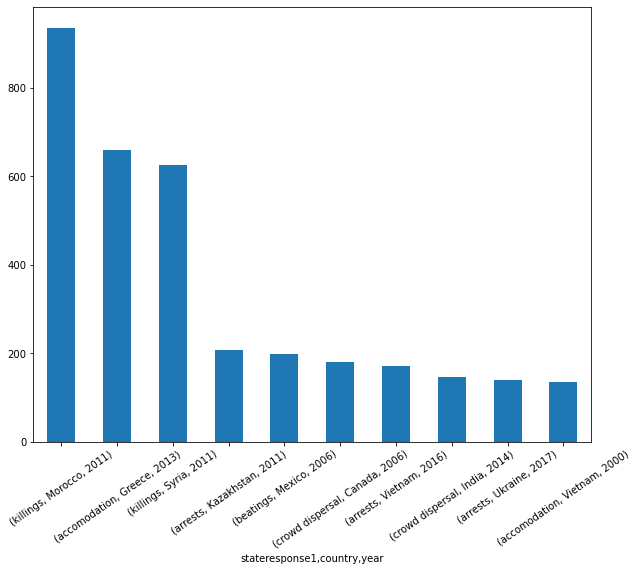

In [271]:
plt.figure(figsize=(10,8))
df.groupby(['stateresponse1','country','year'])['total_days'].mean().sort_values(ascending=False).head(10).plot.bar()
plt.xticks(rotation=35);

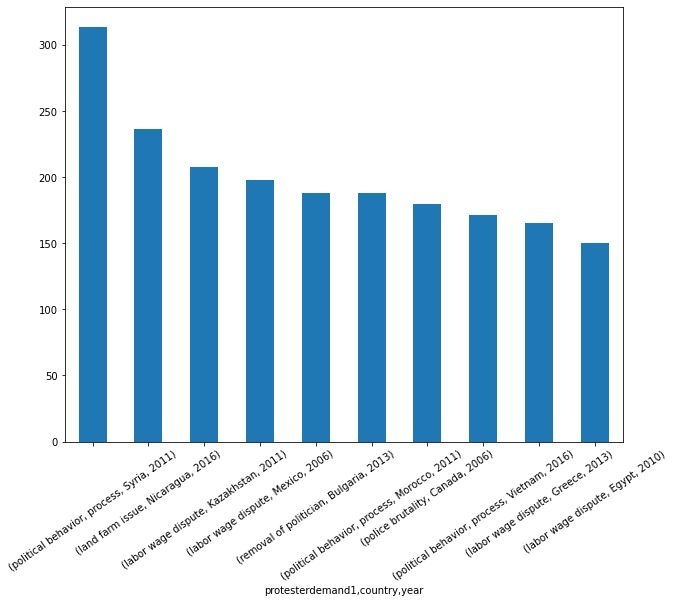

In [272]:
plt.figure(figsize=(10,8))
df.groupby(['protesterdemand1','country','year'])['total_days'].mean().sort_values(ascending=False).head(10).plot.bar()
plt.xticks(rotation=35);

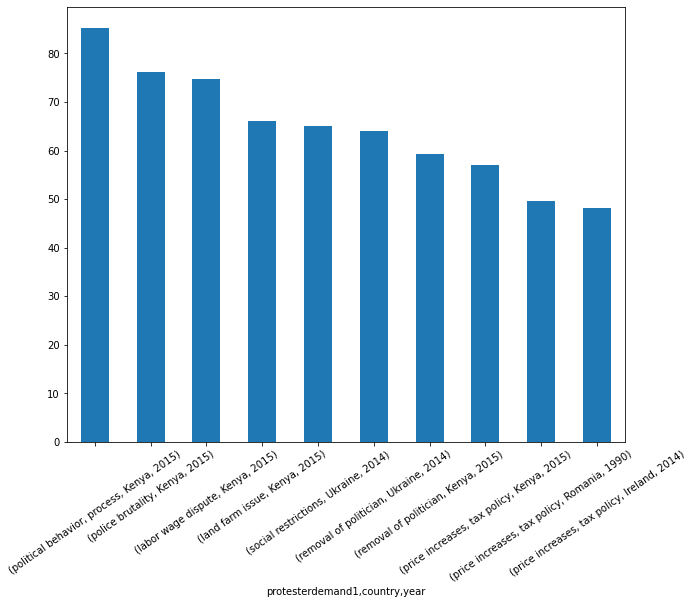

In [273]:
plt.figure(figsize=(10,8))
df.groupby(['protesterdemand1','country','year'])['protestnumber'].mean().sort_values(ascending=False).head(10).plot.bar()
plt.xticks(rotation=35);

IndexError: index 0 is out of bounds for axis 0 with size 0

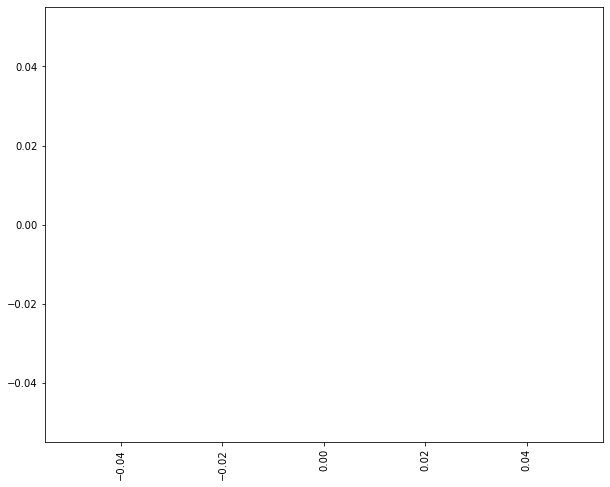

In [314]:
plt.figure(figsize=(10,8))
df.groupby(['protesterdemand1','stateresponse1','country','year'])['total_days'].sum().sort_values(ascending=False).head(10).plot.bar()
plt.xticks(rotation=35)
plt.ylabel('Avg Protest Duration (Days)');

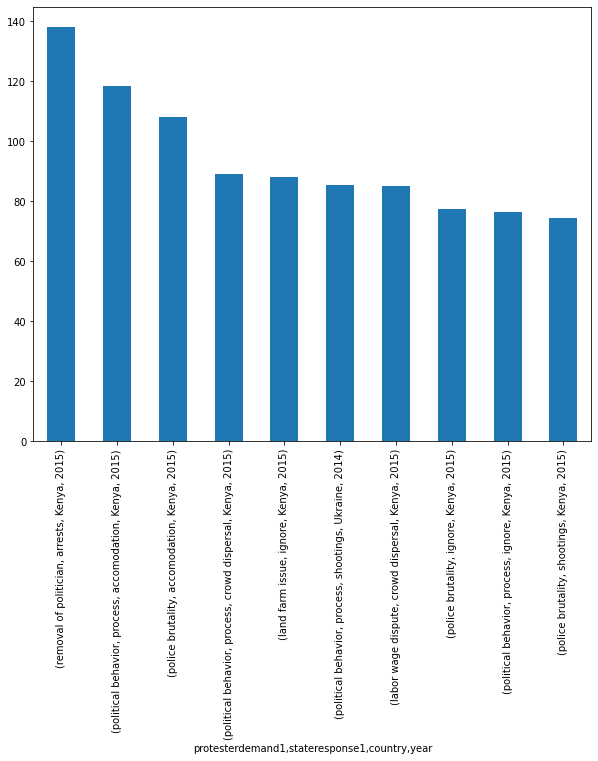

In [275]:
plt.figure(figsize=(10,8))
df.groupby(['protesterdemand1','stateresponse1','country','year'])['protestnumber'].mean().sort_values(ascending=False).head(10).plot.bar()
plt.xticks();

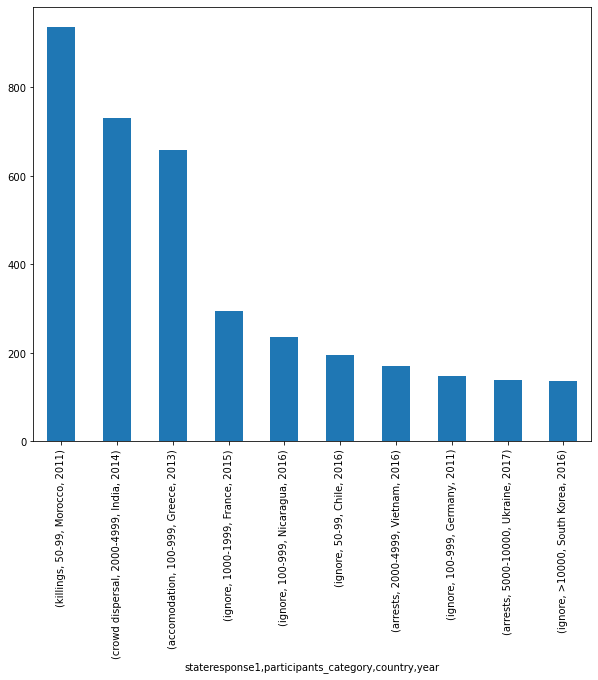

In [276]:
plt.figure(figsize=(10,8))
df.groupby(['stateresponse1','participants_category','country','year'])['total_days'].mean().sort_values(ascending=False).head(10).plot.bar()
plt.xticks();

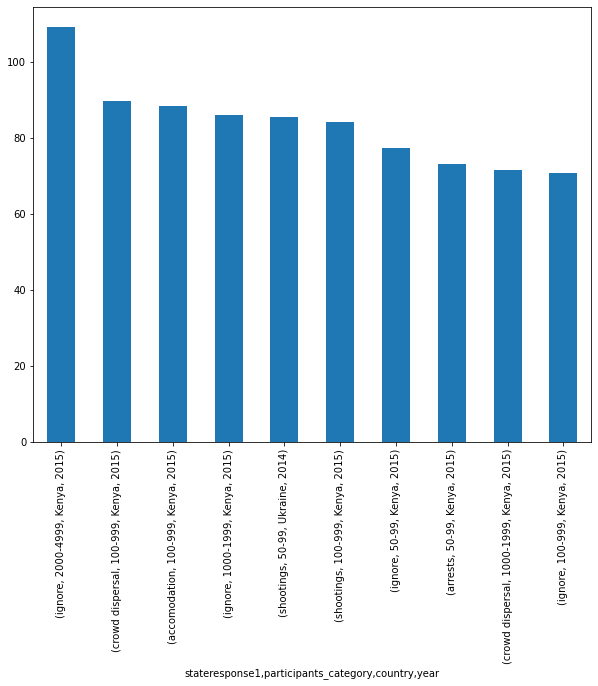

In [277]:
plt.figure(figsize=(10,8))
df.groupby(['stateresponse1','participants_category','country','year'])['protestnumber'].mean().sort_values(ascending=False).head(10).plot.bar()
plt.xticks();

In [278]:
df.groupby(['country','year'])['total_days'].mean().sort_values(ascending=False).head(10)

country    year
Syria      2011    209.166667
Canada     2006    180.000000
Vietnam    2016    171.000000
Morocco    2011    156.833333
Vietnam    2000    135.000000
Canada     2012    119.000000
Nicaragua  2016    118.750000
Ecuador    2016     94.500000
Vietnam    2001     92.500000
Jamaica    1993     89.500000
Name: total_days, dtype: float64

In [279]:
pd.DataFrame(df.groupby(['country','year','protesterdemand1','stateresponse1']))

,0,1
0,"(Afghanistan, 1991, police brutality, arrests)",country ccode year region protes...
1,"(Afghanistan, 1997, police brutality, ignore)",country ccode year region protes...
2,"(Afghanistan, 1998, social restrictions, ignore)",country ccode year region protes...
3,"(Afghanistan, 2002, political behavior, proces...",country ccode year region protes...
4,"(Afghanistan, 2005, social restrictions, ignore)",country ccode year region protes...
...,...,...
7579,"(Zimbabwe, 2018, political behavior, process, ...",country ccode year region protest ...
7580,"(Zimbabwe, 2018, political behavior, process, ...",country ccode year region protest ...
7581,"(Zimbabwe, 2019, political behavior, process, ...",country ccode year region protest ...
7582,"(Zimbabwe, 2019, price increases, tax policy, ...",country ccode year region protest ...


/Users/ash/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


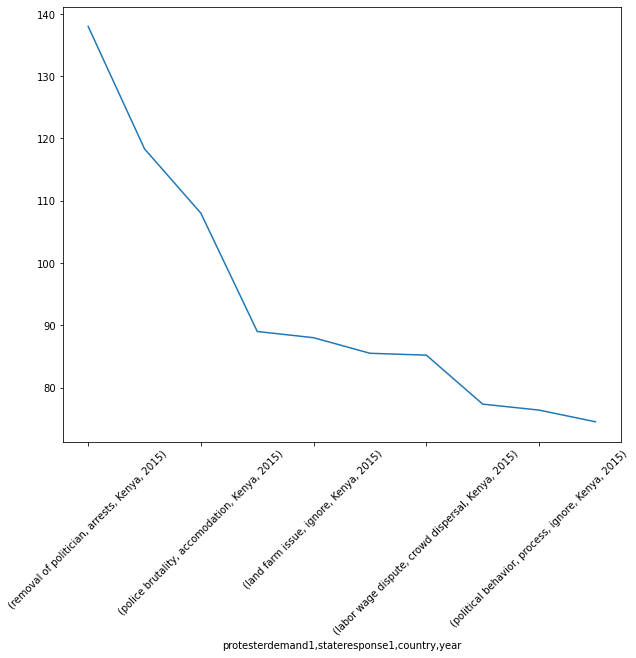

In [280]:
plt.figure(figsize=(10,8))
df.groupby(['protesterdemand1','stateresponse1','country','year'])['protestnumber'].mean().sort_values(ascending=False).head(10).plot()
plt.xticks(rotation=45);

In [281]:
df.head()

,country,ccode,year,region,protest,protestnumber,startday,startmonth,startyear,endday,endmonth,endyear,protesterviolence,location,participants_category,participants,protesteridentity,protesterdemand1,protesterdemand2,protesterdemand3,protesterdemand4,stateresponse1,stateresponse2,stateresponse3,stateresponse4,stateresponse5,stateresponse6,stateresponse7,years,months,days,total_days
0,Canada,20,1990,North America,1,1,15.0,1.0,1990.0,15.0,1.0,1990.0,0.0,national,NaN,1000s,unspecified,"political behavior, process",labor wage dispute,NaN,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0
1,Canada,20,1990,North America,1,2,25.0,6.0,1990.0,25.0,6.0,1990.0,0.0,"Montreal, Quebec",NaN,1000,unspecified,"political behavior, process",NaN,NaN,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0
2,Canada,20,1990,North America,1,3,1.0,7.0,1990.0,1.0,7.0,1990.0,0.0,"Montreal, Quebec",NaN,500,separatist Parti Quebecois,"political behavior, process",NaN,NaN,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0
3,Canada,20,1990,North America,1,4,12.0,7.0,1990.0,6.0,9.0,1990.0,1.0,"Montreal, Quebec",NaN,100s,Mohawk Indians,land farm issue,NaN,NaN,NaN,accomodation,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,-6.0,56.0
4,Canada,20,1990,North America,1,5,14.0,8.0,1990.0,15.0,8.0,1990.0,1.0,"Montreal, Quebec",NaN,950,local residents,"political behavior, process",NaN,NaN,NaN,crowd dispersal,arrests,accomodation,NaN,NaN,NaN,NaN,0.0,0.0,1.0,2.0


In [282]:
df['stateresponse1'] = np.where(df['stateresponse1'] == 'accomodation',1,0)

In [283]:
df['participants_category'].value_counts()

100-999       3011
50-99         2387
2000-4999     1485
>10000        1250
5000-10000     563
1000-1999      464
Name: participants_category, dtype: int64

In [284]:
df['protesterdemand4'].isnull().value_counts()

True     15467
False      896
Name: protesterdemand4, dtype: int64

In [285]:
df['participants_category'].isnull().value_counts()

False    9160
True     7203
Name: participants_category, dtype: int64

In [286]:
df['protesterdemand1'].isnull().value_counts()

False    14503
True      1860
Name: protesterdemand1, dtype: int64

In [287]:
df['protest'].isnull().value_counts()

False    16363
Name: protest, dtype: int64

In [288]:
df['region'].value_counts()

Europe             5277
Africa             3630
Asia               3300
South America      1653
MENA               1410
North America       560
Central America     484
Oceania              49
Name: region, dtype: int64

In [289]:
df['ccode'].value_counts()

200    547
220    527
205    434
255    360
501    350
      ... 
529     11
525      9
315      6
678      4
260      2
Name: ccode, Length: 168, dtype: int64

### Processing for Models

In [290]:
df.fillna(0,inplace=True)
only_p.fillna(0,inplace=True)

In [291]:
only_p.shape

(14514, 32)

In [292]:
country_list = list(pd.DataFrame(df['country'].value_counts()).T.columns)

In [293]:
df['region'].value_counts()

Europe             5277
Africa             3630
Asia               3300
South America      1653
MENA               1410
North America       560
Central America     484
Oceania              49
Name: region, dtype: int64

In [294]:
# separate DFs by region
# AH to consider asia and MENA

euro_df = df[df['region'] == 'Europe'].copy()
asia_df = df[df['region'] == 'Asia'].copy()
africa_df = df[df['region'] == 'Africa'].copy()
sa_df = df[df['region'] == 'South America'].copy()
mena_df = df[df['region'] == 'MENA'].copy()
na_df = df[df['region'] == 'North America'].copy()
ca_df = df[df['region'] == 'Central America'].copy()
oc_df = df[df['region'] == 'Oceania'].copy()

In [295]:
sa_df.shape

(1653, 32)

In [296]:
only_p.head()

,country,ccode,year,region,protest,protestnumber,startday,startmonth,startyear,endday,endmonth,endyear,protesterviolence,location,participants_category,participants,protesteridentity,protesterdemand1,protesterdemand2,protesterdemand3,protesterdemand4,stateresponse1,stateresponse2,stateresponse3,stateresponse4,stateresponse5,stateresponse6,stateresponse7,years,months,days,total_days
0,Canada,20,1990,North America,1,1,15.0,1.0,1990.0,15.0,1.0,1990.0,0.0,national,0,1000s,unspecified,"political behavior, process",labor wage dispute,0,0,ignore,0,0,0,0,0,0,0.0,0.0,0.0,1.0
1,Canada,20,1990,North America,1,2,25.0,6.0,1990.0,25.0,6.0,1990.0,0.0,"Montreal, Quebec",0,1000,unspecified,"political behavior, process",0,0,0,ignore,0,0,0,0,0,0,0.0,0.0,0.0,1.0
2,Canada,20,1990,North America,1,3,1.0,7.0,1990.0,1.0,7.0,1990.0,0.0,"Montreal, Quebec",0,500,separatist Parti Quebecois,"political behavior, process",0,0,0,ignore,0,0,0,0,0,0,0.0,0.0,0.0,1.0
3,Canada,20,1990,North America,1,4,12.0,7.0,1990.0,6.0,9.0,1990.0,1.0,"Montreal, Quebec",0,100s,Mohawk Indians,land farm issue,0,0,0,accomodation,0,0,0,0,0,0,0.0,2.0,-6.0,56.0
4,Canada,20,1990,North America,1,5,14.0,8.0,1990.0,15.0,8.0,1990.0,1.0,"Montreal, Quebec",0,950,local residents,"political behavior, process",0,0,0,crowd dispersal,arrests,accomodation,0,0,0,0,0.0,0.0,1.0,2.0


In [297]:
# Multi-class feature arrangement - Stateresponse1 to be target

remove_features = ['ccode','startyear','endyear','startday',
                   'endday','protest','years','months','days',
                  'participants','protesteridentity','location','country','endmonth',
                  'stateresponse2','stateresponse3','stateresponse4',
                   'stateresponse5','stateresponse6','stateresponse7']

dummy_columns = ['region','startmonth','participants_category',
                 'protesterdemand1','year','protesterdemand2',
                'protesterdemand3','protesterdemand4']

# dummy_columns = ['region','participants_category',
#                  'protesterdemand1','protesterdemand2',
#                 'protesterdemand3','protesterdemand4']

In [298]:
df['participants_category'].value_counts()

0             7203
100-999       3011
50-99         2387
2000-4999     1485
>10000        1250
5000-10000     563
1000-1999      464
Name: participants_category, dtype: int64

In [299]:
# new dataframes from original DF

model_simple = only_p.drop(columns=remove_features)
asia_df = asia_df.drop(columns=remove_features)
mena_df = mena_df.drop(columns=remove_features)

model_simple = pd.get_dummies(model_simple,columns=dummy_columns)
asia_df = pd.get_dummies(asia_df,columns=dummy_columns)
mena_df = pd.get_dummies(mena_df,columns=dummy_columns)

stateresponse_codes = {'accomodation':1,'ignore':2,'arrests':3,'crowd dispersal':4,
                       'shootings':5,'beatings':6,'killings':7}

# Map digits to target feature
model_simple['stateresponse1'] = model_simple['stateresponse1'].map(stateresponse_codes)
asia_df['stateresponse1'] = asia_df['stateresponse1'].map(stateresponse_codes)
mena_df['stateresponse1'] = mena_df['stateresponse1'].map(stateresponse_codes)
df['stateresponse1'] = df['stateresponse1'].map(stateresponse_codes)

# Removing final null values for target column
model_simple.dropna(inplace=True)
asia_df.dropna(inplace=True)
mena_df.dropna(inplace=True)
df.dropna(inplace=True)

In [300]:
# for col in model_simple.columns:
#     if 'response' in col:
#         model_simple[col] = model_simple[col].map(stateresponse_codes)
#         asia_df[col] = asia_df[col].map(stateresponse_codes)
#         mena_df[col] = mena_df[col].map(stateresponse_codes)
#         df[col] = df[col].map(stateresponse_codes)

In [301]:
df.shape

(0, 32)

In [302]:
model_simple.shape

(14483, 93)

In [303]:
model_simple.isnull().sum()

protestnumber                                   0
protesterviolence                               0
stateresponse1                                  0
total_days                                      0
region_Africa                                   0
                                               ..
protesterdemand4_land farm issue                0
protesterdemand4_police brutality               0
protesterdemand4_political behavior, process    0
protesterdemand4_price increases, tax policy    0
protesterdemand4_removal of politician          0
Length: 93, dtype: int64

In [304]:
model_simple.shape

(14483, 93)

In [305]:
model_simple.dropna().shape

(14483, 93)

In [306]:
model_simple.head()

,protestnumber,protesterviolence,stateresponse1,total_days,region_Africa,region_Asia,region_Central America,region_Europe,region_MENA,region_North America,region_Oceania,region_South America,startmonth_1.0,startmonth_2.0,startmonth_3.0,startmonth_4.0,startmonth_5.0,startmonth_6.0,startmonth_7.0,startmonth_8.0,startmonth_9.0,startmonth_10.0,startmonth_11.0,startmonth_12.0,participants_category_0,participants_category_100-999,participants_category_1000-1999,participants_category_2000-4999,participants_category_50-99,participants_category_5000-10000,participants_category_>10000,protesterdemand1_0,protesterdemand1_labor wage dispute,protesterdemand1_land farm issue,protesterdemand1_police brutality,"protesterdemand1_political behavior, process","protesterdemand1_price increases, tax policy",protesterdemand1_removal of politician,protesterdemand1_social restrictions,year_1990,year_1991,year_1992,year_1993,year_1994,year_1995,year_1996,year_1997,year_1998,year_1999,year_2000,year_2001,year_2002,year_2003,year_2004,year_2005,year_2006,year_2007,year_2008,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019,protesterdemand2_0,protesterdemand2_labor wage dispute,protesterdemand2_land farm issue,protesterdemand2_police brutality,"protesterdemand2_political behavior, process","protesterdemand2_price increases, tax policy",protesterdemand2_removal of politician,protesterdemand2_social restrictions,protesterdemand3_0,protesterdemand3_labor wage dispute,protesterdemand3_land farm issue,protesterdemand3_police brutality,"protesterdemand3_political behavior, process","protesterdemand3_price increases, tax policy",protesterdemand3_removal of politician,protesterdemand3_social restrictions,protesterdemand4_0,protesterdemand4_.,protesterdemand4_labor wage dispute,protesterdemand4_land farm issue,protesterdemand4_police brutality,"protesterdemand4_political behavior, process","protesterdemand4_price increases, tax policy",protesterdemand4_removal of politician
0,1,0.0,2.0,1.0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2,0.0,2.0,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,3,0.0,2.0,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,4,1.0,1.0,56.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,5,1.0,4.0,2.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


## Modeling

In [307]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, f1_score, plot_confusion_matrix, roc_auc_score, plot_roc_curve 

In [308]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [319]:
X = model_simple.drop(columns='stateresponse1')
y = model_simple['stateresponse1']

In [320]:
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,random_state=77)

In [321]:
pipe_log = Pipeline([
    ('ss',StandardScaler()),
    ('pc',PCA()),
    ('model',LogisticRegression())
])
log_params = {'pc__n_components':[10,15,20],
              'model__max_iter': [500, 1000],
              'model__C': [.1, 1, 10, 100],
              'model__solver': ['liblinear', 'lbfgs', 'sag'],
              'model__penalty': ['l2']}
logreg = GridSearchCV(pipe_log,
                     log_params,
                     cv=5,
                     verbose=1)
logreg.fit(X_train,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  2.6min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ss', StandardScaler()), ('pc', PCA()),
                                       ('model', LogisticRegression())]),
             param_grid={'model__C': [0.1, 1, 10, 100],
                         'model__max_iter': [500, 1000],
                         'model__penalty': ['l2'],
                         'model__solver': ['liblinear', 'lbfgs', 'sag'],
                         'pc__n_components': [10, 15, 20]},
             verbose=1)

In [318]:
logreg.score(X_train,y_train), logreg.score(X_test,y_test)

(0.5759528631927822, 0.5683512841756421)

In [311]:
pipe_dt = Pipeline([
    ('ss',StandardScaler()),
    ('pc',PCA()),
    ('model',DecisionTreeClassifier())
])

In [312]:
pipe_dt.get_params()

{'memory': None,
 'steps': [('ss', StandardScaler()),
  ('pc', PCA()),
  ('model', DecisionTreeClassifier())],
 'verbose': False,
 'ss': StandardScaler(),
 'pc': PCA(),
 'model': DecisionTreeClassifier(),
 'ss__copy': True,
 'ss__with_mean': True,
 'ss__with_std': True,
 'pc__copy': True,
 'pc__iterated_power': 'auto',
 'pc__n_components': None,
 'pc__random_state': None,
 'pc__svd_solver': 'auto',
 'pc__tol': 0.0,
 'pc__whiten': False,
 'model__ccp_alpha': 0.0,
 'model__class_weight': None,
 'model__criterion': 'gini',
 'model__max_depth': None,
 'model__max_features': None,
 'model__max_leaf_nodes': None,
 'model__min_impurity_decrease': 0.0,
 'model__min_impurity_split': None,
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 2,
 'model__min_weight_fraction_leaf': 0.0,
 'model__presort': 'deprecated',
 'model__random_state': None,
 'model__splitter': 'best'}

In [313]:
dt_params = {'pc__n_components':[10,15,20]}

dtc = GridSearchCV(pipe_dt,
                     dt_params,
                     cv=5,
                     verbose=1)

dtc.fit(X_train,y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    3.6s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ss', StandardScaler()), ('pc', PCA()),
                                       ('model', DecisionTreeClassifier())]),
             param_grid={'pc__n_components': [10, 15, 20]}, verbose=1)

In [211]:
dtc.score(X_train,y_train), dtc.score(X_test,y_test)

(0.7090420769919427, 0.4174496644295302)

In [212]:
pipe_knn = Pipeline([
    ('ss',StandardScaler()),
    ('pc',PCA()),
    ('model',KNeighborsClassifier())
])

knn_params = {'pc__n_components':[10,15,20],
              'model__n_neighbors':[3,4,5,6],
             'model__p':[2,3,4]}

knn = GridSearchCV(pipe_knn,
                     knn_params,
                     cv=5,
                     verbose=1)

knn.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:   10.4s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ss', StandardScaler()), ('pc', PCA()),
                                       ('model', KNeighborsClassifier())]),
             param_grid={'model__n_neighbors': [3, 4, 5, 6],
                         'model__p': [2, 3, 4],
                         'pc__n_components': [10, 15, 20]},
             verbose=1)

In [213]:
knn.score(X_train,y_train), knn.score(X_test,y_test)

(0.6374216651745748, 0.5677852348993289)

In [214]:
# Setting up GridSearches:
# Fit Random Forest


pipe_rfc = Pipeline([
    ('ss',StandardScaler()),
    ('pc',PCA()),
    ('model',RandomForestClassifier())
])


rfc_params = {'pc__n_components':[10,15,20],
              'model__criterion':['gini','entropy'],
              'model__max_features':['auto','sqrt','log2'],
             'model__ccp_alpha':[0.01,0.05,0.07]}

# Support Vector Classifier was modelled in different Notebook due to significant runtimes.

rfc = GridSearchCV(pipe_rfc,
                     rfc_params,
                     cv=5,
                     verbose=1)

In [215]:
rfc.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:  3.4min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ss', StandardScaler()), ('pc', PCA()),
                                       ('model', RandomForestClassifier())]),
             param_grid={'model__ccp_alpha': [0.01, 0.05, 0.07],
                         'model__criterion': ['gini', 'entropy'],
                         'model__max_features': ['auto', 'sqrt', 'log2'],
                         'pc__n_components': [10, 15, 20]},
             verbose=1)

In [216]:
rfc.score(X_train,y_train), rfc.score(X_test,y_test)

(0.6114592658907789, 0.5959731543624162)

In [217]:
# Fit AdaBoost

pipe_ada = Pipeline([
    ('ss',StandardScaler()),
    ('pc',PCA()),
    ('model',AdaBoostClassifier())
])

ada_params = {'pc__n_components':[10,15,20],
              'model__n_estimators':[40,50,60],
             'model__learning_rate':[0.5,1,1.5]}

ada = GridSearchCV(pipe_ada,
                     ada_params,
                     cv=5,
                     verbose=1)

In [218]:
ada.fit(X_train,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:   32.6s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ss', StandardScaler()), ('pc', PCA()),
                                       ('model', AdaBoostClassifier())]),
             param_grid={'model__learning_rate': [0.5, 1, 1.5],
                         'model__n_estimators': [40, 50, 60],
                         'pc__n_components': [10, 15, 20]},
             verbose=1)

In [219]:
ada.score(X_train,y_train), ada.score(X_test,y_test)

(0.5796777081468218, 0.5731543624161074)

In [220]:
# Fit Bagger

pipe_bag = Pipeline([
    ('ss',StandardScaler()),
    ('pc',PCA()),
    ('model',BaggingClassifier())
])

bag_params = {'pc__n_components':[10,15,20],
              'model__n_estimators':[10,20,30],
              'model__max_samples':[1,2,3]
             }

bag = GridSearchCV(pipe_bag,
                     bag_params,
                     cv=5,
                     verbose=1)

bag.fit(X_train,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    6.1s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ss', StandardScaler()), ('pc', PCA()),
                                       ('model', BaggingClassifier())]),
             param_grid={'model__max_samples': [1, 2, 3],
                         'model__n_estimators': [10, 20, 30],
                         'pc__n_components': [10, 15, 20]},
             verbose=1)

In [221]:
bag.score(X_train,y_train), bag.score(X_test,y_test)

(0.5049239033124441, 0.5020134228187919)

In [222]:
pipe_bag = Pipeline([
    ('ss',StandardScaler()),
    ('pc',PCA()),
    ('model',SVC())
])

svc_params = {'pc__n_components':[10,15,20],
              'model__C':[0.01,0.05],
             'model__degree':[3,4,5]}

svc = GridSearchCV(pipe_bag,
                     svc_params,
                     cv=5,
                     verbose=1)

svc.fit(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:   12.0s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ss', StandardScaler()), ('pc', PCA()),
                                       ('model', SVC())]),
             param_grid={'model__C': [0.01, 0.05], 'model__degree': [3, 4, 5],
                         'pc__n_components': [10, 15, 20]},
             verbose=1)

In [ ]:
svc.score(X_train,y_train), svc.score(X_test,y_test)

### Metrics: